<a href="https://colab.research.google.com/github/JihoKimkimkim/python_practice/blob/main/practice_preprocessing_194.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# '쉽게 배우는 파이썬 데이터 분석, 김영우, 2022'
#p194
import pandas as pd
import numpy as np
dt = pd.read_csv('/content/drive/MyDrive/pything/mpg.csv')

In [9]:
# drv 이상치 할당
dt.loc[[9,13,57,92], 'drv'] = 'k'
# cty 이상치 할당
dt.loc[[28,42,128,202], 'cty'] = [3,4,39,42]

In [13]:
#Q1. 이상치가 확인, 이상치 결측처리, 이상치 확인
#이상치 확인
dt['drv'].value_counts().sort_index()

,count
drv,
4,100
f,106
k,4
r,24


In [22]:
#이상치 제거
dt['drv'] = np.where(dt['drv'].isin(['4','f','r']), dt['drv'], np.nan)

In [23]:
#이상치 확인
dt['drv'].value_counts().sort_index()

,count
drv,
4,100
f,106
r,24


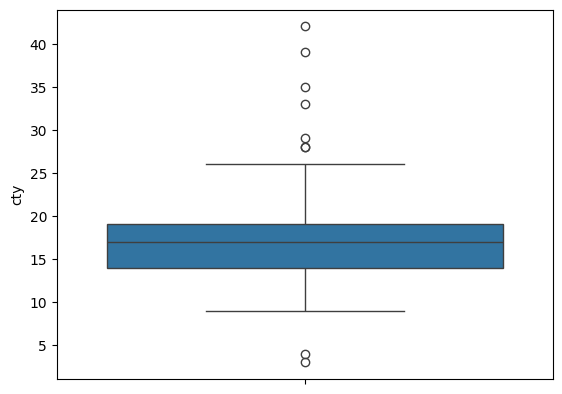

In [35]:
#Q2. 상자 그림을 통해 cty 이상치 확인, 결측처리, 상자 그림으로 이상치 확인
import seaborn as sns #figure library
#상자그림 이상치 확인
sns.boxplot(data = dt, y ='cty')
pt25 = dt['cty'].quantile(0.25) #1사분위 수
pt75 = dt['cty'].quantile(0.75) #3사분위 수
IQR = pt75 - pt25 #IQR

In [41]:
pt25 - 1.5 * IQR

np.float64(6.5)

In [40]:
pt75 + 1.5 * IQR

np.float64(26.5)

In [42]:
# 결측처리
dt['cty'] = np.where((dt['cty'] < 6.5) | (dt['cty'] > 26.5), np.nan, dt['cty'])

<Axes: ylabel='cty'>

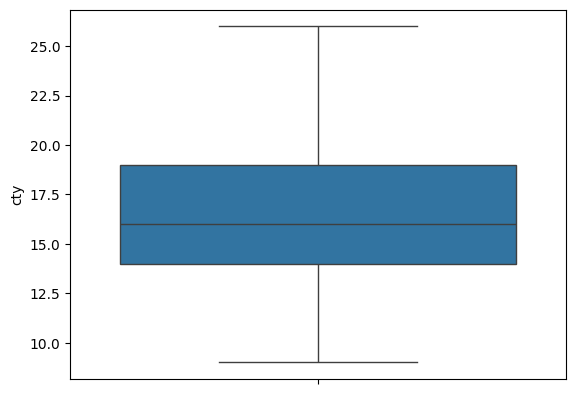

In [43]:
# 상자그림 이상치 확인
sns.boxplot(data = dt, y ='cty')

In [ ]:
#Q3. drv, cty 평균 비교. pandas 구문으로 만들 것
dt.dropna(subset = ['drv', 'cty'])\ #결측치 제거
  .groupby('drv')\ # drv 분리
  .agg(mean_cty = ('cty', mean'')) #cty 평균